In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

In [140]:
def get_stock_data(stock_name,shift_window, normalized=0):
    from pandas_datareader import data

    # Only get the adjusted close.
    df = data.DataReader(stock_name,
                       start='2017-1-1',
                       end='2018-08-20',
                       data_source='yahoo')

    df['Adj Close future'] = df['Adj Close'].shift(-shift_window)
    #df['Difference'] = ( df['Adj Close'].shift(-shift_window) / df['Adj Close'] ) 
    #df['Difference'] = ( df['Difference'] -1 )
    #print(df.head())
    df['Volume'] /= 100
    return df[:-shift_window]

In [141]:
stock_name = 'TS.BA'
df = get_stock_data(stock_name,10,1)




                  High         Low        Open       Close   Volume  \
Date                                                                  
2017-01-02  285.000000  281.000000  281.000000  284.000000  12161.0   
2017-01-03  289.000000  283.000000  284.000000  285.000000  40930.0   
2017-01-04  289.500000  283.049988  284.899994  288.500000  71984.0   
2017-01-05  290.200012  288.000000  288.649994  288.000000  32706.0   
2017-01-06  288.000000  283.600006  287.950012  284.299988  24804.0   

             Adj Close  Adj Close future  
Date                                      
2017-01-02  282.917358        283.913574  
2017-01-03  283.913574        281.921204  
2017-01-04  287.400208        285.407837  
2017-01-05  286.902130        284.909760  
2017-01-06  283.216217        288.894501  


In [142]:
print(df.tail(25))
df_val = df.values
df_val[3]

                  High         Low        Open       Close   Volume  \
Date                                                                  
2018-07-02  532.000000  510.049988  521.750000  516.099976   685.75   
2018-07-03  525.000000  507.000000  521.000000  508.500000   350.18   
2018-07-04  518.950012  505.000000  510.000000  505.450012    99.16   
2018-07-05  529.500000  505.450012  505.450012  523.950012   907.48   
2018-07-06  534.650024  520.000000  524.000000  528.200012   210.74   
2018-07-10  550.000000  529.000000  549.950012  529.950012   162.03   
2018-07-11  525.000000  505.000000  513.000000  510.000000   288.14   
2018-07-12  517.900024  505.000000  515.000000  511.149994   170.46   
2018-07-13  519.950012  508.000000  510.000000  512.849976   307.76   
2018-07-16  514.000000  505.149994  513.000000  509.100006   297.30   
2018-07-17  515.000000  506.000000  509.000000  510.649994   169.34   
2018-07-18  524.950012  508.100006  524.950012  514.200012   142.81   
2018-0

array([290.20001221, 288.        , 288.6499939 , 288.        ,
       327.06      , 286.90213013, 284.90975952])

In [143]:
def load_data(stock, seq_len):

    data = stock
    amount_of_features = len(data[::-1][0]) - 1
    
    
    sequence_length = seq_len 
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length + 1])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    print ("x_test:",x_test)
    y_test = result[int(row):, -1][:,-1]
    print ("y_test:",y_test)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [144]:
def load_data_v2(stock, seq_len):

    data_x = stock
    data_y = stock
    #print("DATA Y 0 :",data_y)
    print ("Amount of features TOT :",len(data_x[0]) )
    data_x = np.delete(data_x,np.s_[len(stock[0])-1],axis=1)
    data_y = np.delete(data_y,np.s_[0:len(stock[0])-1],axis=1)
    #print("DATA Y :",data_y)
    amount_of_features = len(data_x[0]) 
    
    print ("Amount of features found:",amount_of_features)
    
    sequence_length = seq_len 
    result_x = []
    result_y = []
    for index in range(len(data_x) - sequence_length ):
        result_x.append(data_x[index: index + sequence_length + 1])
        result_y.append(data_y[index: index + sequence_length + 1])

    result_x = np.array(result_x)
    result_y = np.array(result_y)
    
    row = round(0.92 * result_x.shape[0])
    train_x = result_x[:int(row), :]
    train_y = result_y[:int(row), :]
    
    x_train = train_x[:, :-1]
    x_test = result_x[int(row):, :-1]
   
    y_train = train_y[:, -1]
    y_test = result_y[int(row):, -1]
    
    #print ("x_test before:",x_test)
    #print ("y_test before:",y_test)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  
    print ("x_test:",x_test)
    print ("y_test:",y_test)

    return [x_train, y_train, x_test, y_test]

In [145]:
load_data_v2(df_val, 10)

Amount of features TOT : 7
Amount of features found: 6
x_test: [[[ 476.          462.3999939   462.3999939   467.45001221  179.15
    467.45001221]
  [ 488.8999939   470.3999939   479.45001221  484.20001221  617.12
    484.20001221]
  [ 484.20001221  470.          484.20001221  472.          292.58
    472.        ]
  ...
  [ 488.          480.          481.          487.1499939   504.05
    487.1499939 ]
  [ 500.          476.04998779  499.95001221  480.29998779 1010.13
    480.29998779]
  [ 502.5         489.04998779  489.04998779  493.8999939   523.05
    493.8999939 ]]

 [[ 488.8999939   470.3999939   479.45001221  484.20001221  617.12
    484.20001221]
  [ 484.20001221  470.          484.20001221  472.          292.58
    472.        ]
  [ 483.          464.          472.          479.          302.41
    479.        ]
  ...
  [ 500.          476.04998779  499.95001221  480.29998779 1010.13
    480.29998779]
  [ 502.5         489.04998779  489.04998779  493.8999939   523.05
    49

[array([[[ 285.        ,  281.        ,  281.        ,  284.        ,
           121.61      ,  282.9173584 ],
         [ 289.        ,  283.        ,  284.        ,  285.        ,
           409.3       ,  283.91357422],
         [ 289.5       ,  283.04998779,  284.8999939 ,  288.5       ,
           719.84      ,  287.40020752],
         ...,
         [ 286.        ,  277.        ,  281.        ,  283.8999939 ,
           328.42      ,  282.81774902],
         [ 286.        ,  280.5       ,  283.8999939 ,  283.75      ,
           188.45      ,  282.66833496],
         [ 285.        ,  283.        ,  284.        ,  284.        ,
           176.06      ,  282.9173584 ]],
 
        [[ 289.        ,  283.        ,  284.        ,  285.        ,
           409.3       ,  283.91357422],
         [ 289.5       ,  283.04998779,  284.8999939 ,  288.5       ,
           719.84      ,  287.40020752],
         [ 290.20001221,  288.        ,  288.6499939 ,  288.        ,
           327.06      , 

In [146]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[2]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,kernel_initializer='uniform',activation='relu'))        
        model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [147]:
len(df_val[0])

7

In [148]:
df_val = df.values / 1000
#for a in range(len(df_val[0])-2):
#    df_val[:,a] /= 1000
window  =  5
X_train, y_train, X_test, y_test = load_data_v2(df_val[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

Amount of features TOT : 7
Amount of features found: 6
x_test: [[[0.265      0.26       0.2645     0.261      0.17853    0.26000507]
  [0.26525    0.259      0.2615     0.264      0.28015    0.26299362]
  [0.26695001 0.26114999 0.266      0.262      0.15064    0.26100122]
  [0.266      0.26310001 0.26425    0.265      0.17396    0.26398981]
  [0.26720001 0.264      0.26720001 0.266      0.14868    0.26498599]]

 [[0.26525    0.259      0.2615     0.264      0.28015    0.26299362]
  [0.26695001 0.26114999 0.266      0.262      0.15064    0.26100122]
  [0.266      0.26310001 0.26425    0.265      0.17396    0.26398981]
  [0.26720001 0.264      0.26720001 0.266      0.14868    0.26498599]
  [0.26889999 0.265      0.2665     0.26714999 0.12141    0.26613159]]

 [[0.26695001 0.26114999 0.266      0.262      0.15064    0.26100122]
  [0.266      0.26310001 0.26425    0.265      0.17396    0.26398981]
  [0.26720001 0.264      0.26720001 0.266      0.14868    0.26498599]
  [0.26889999 0.265    

In [149]:
# model = build_model([3,lag,1])
#model = build_model2([3,window,1])
model = build_model2([len(df_val[0])-1,5,1])

model.fit(
    X_train,
    y_train,
    batch_size=576,
    epochs=250,
    validation_split=0.1,
    verbose=1)

Train on 317 samples, validate on 36 samples
Epoch 1/250
317/317 [==============================] - 11s 35ms/step - loss: 0.1158 - acc: 0.0000e+00 - val_loss: 0.0628 - val_acc: 0.0000e+00
Epoch 2/250
317/317 [==============================] - 0s 636us/step - loss: 0.1145 - acc: 0.0000e+00 - val_loss: 0.0618 - val_acc: 0.0000e+00
Epoch 3/250
317/317 [==============================] - 0s 492us/step - loss: 0.1130 - acc: 0.0000e+00 - val_loss: 0.0608 - val_acc: 0.0000e+00
Epoch 4/250
317/317 [==============================] - 0s 624us/step - loss: 0.1115 - acc: 0.0000e+00 - val_loss: 0.0596 - val_acc: 0.0000e+00
Epoch 5/250
317/317 [==============================] - 0s 668us/step - loss: 0.1096 - acc: 0.0000e+00 - val_loss: 0.0582 - val_acc: 0.0000e+00
Epoch 6/250
317/317 [==============================] - 0s 553us/step - loss: 0.1076 - acc: 0.0000e+00 - val_loss: 0.0567 - val_acc: 0.0000e+00
Epoch 7/250
317/317 [==============================] - 0s 617us/step - loss: 0.1053 - acc: 0.0000

Epoch 58/250
317/317 [==============================] - 0s 495us/step - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 6.1056e-04 - val_acc: 0.0000e+00
Epoch 59/250
317/317 [==============================] - 0s 483us/step - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 4.7890e-04 - val_acc: 0.0000e+00
Epoch 60/250
317/317 [==============================] - 0s 459us/step - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 4.2649e-04 - val_acc: 0.0000e+00
Epoch 61/250
317/317 [==============================] - 0s 496us/step - loss: 0.0048 - acc: 0.0000e+00 - val_loss: 4.3167e-04 - val_acc: 0.0000e+00
Epoch 62/250
317/317 [==============================] - 0s 495us/step - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 4.9126e-04 - val_acc: 0.0000e+00
Epoch 63/250
317/317 [==============================] - 0s 492us/step - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 6.1176e-04 - val_acc: 0.0000e+00
Epoch 64/250
317/317 [==============================] - 0s 482us/step - loss: 0.0040 - acc: 0.0000e+00 - val_los

Epoch 114/250
317/317 [==============================] - 0s 490us/step - loss: 7.6929e-04 - acc: 0.0000e+00 - val_loss: 1.7943e-04 - val_acc: 0.0000e+00
Epoch 115/250
317/317 [==============================] - 0s 479us/step - loss: 8.1617e-04 - acc: 0.0000e+00 - val_loss: 1.7340e-04 - val_acc: 0.0000e+00
Epoch 116/250
317/317 [==============================] - 0s 494us/step - loss: 8.5496e-04 - acc: 0.0000e+00 - val_loss: 1.7363e-04 - val_acc: 0.0000e+00
Epoch 117/250
317/317 [==============================] - 0s 489us/step - loss: 7.1706e-04 - acc: 0.0000e+00 - val_loss: 1.7411e-04 - val_acc: 0.0000e+00
Epoch 118/250
317/317 [==============================] - 0s 505us/step - loss: 8.6064e-04 - acc: 0.0000e+00 - val_loss: 1.6092e-04 - val_acc: 0.0000e+00
Epoch 119/250
317/317 [==============================] - 0s 470us/step - loss: 7.2140e-04 - acc: 0.0000e+00 - val_loss: 1.4906e-04 - val_acc: 0.0000e+00
Epoch 120/250
317/317 [==============================] - 0s 488us/step - loss: 8.6

Epoch 168/250
317/317 [==============================] - 0s 482us/step - loss: 8.4259e-04 - acc: 0.0000e+00 - val_loss: 8.7758e-05 - val_acc: 0.0000e+00
Epoch 169/250
317/317 [==============================] - 0s 478us/step - loss: 8.7219e-04 - acc: 0.0000e+00 - val_loss: 8.6475e-05 - val_acc: 0.0000e+00
Epoch 170/250
317/317 [==============================] - 0s 473us/step - loss: 7.7412e-04 - acc: 0.0000e+00 - val_loss: 8.3567e-05 - val_acc: 0.0000e+00
Epoch 171/250
317/317 [==============================] - 0s 468us/step - loss: 7.5247e-04 - acc: 0.0000e+00 - val_loss: 8.4215e-05 - val_acc: 0.0000e+00
Epoch 172/250
317/317 [==============================] - 0s 467us/step - loss: 7.6449e-04 - acc: 0.0000e+00 - val_loss: 8.3043e-05 - val_acc: 0.0000e+00
Epoch 173/250
317/317 [==============================] - 0s 482us/step - loss: 7.3372e-04 - acc: 0.0000e+00 - val_loss: 8.2343e-05 - val_acc: 0.0000e+00
Epoch 174/250
317/317 [==============================] - 0s 474us/step - loss: 8.0

Epoch 222/250
317/317 [==============================] - 0s 484us/step - loss: 7.6999e-04 - acc: 0.0000e+00 - val_loss: 9.2265e-05 - val_acc: 0.0000e+00
Epoch 223/250
317/317 [==============================] - 0s 478us/step - loss: 8.0937e-04 - acc: 0.0000e+00 - val_loss: 9.6252e-05 - val_acc: 0.0000e+00
Epoch 224/250
317/317 [==============================] - 0s 470us/step - loss: 8.7223e-04 - acc: 0.0000e+00 - val_loss: 9.4536e-05 - val_acc: 0.0000e+00
Epoch 225/250
317/317 [==============================] - 0s 504us/step - loss: 8.4174e-04 - acc: 0.0000e+00 - val_loss: 9.0419e-05 - val_acc: 0.0000e+00
Epoch 226/250
317/317 [==============================] - 0s 474us/step - loss: 8.9885e-04 - acc: 0.0000e+00 - val_loss: 8.6883e-05 - val_acc: 0.0000e+00
Epoch 227/250
317/317 [==============================] - 0s 466us/step - loss: 7.2975e-04 - acc: 0.0000e+00 - val_loss: 8.6257e-05 - val_acc: 0.0000e+00
Epoch 228/250
317/317 [==============================] - 0s 476us/step - loss: 8.3

In [150]:
trainScore = model.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

print (X_test)

#testScore = model.evaluate(X_test, y_test, verbose=1)
#print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

353/353 [==============================] - 0s 432us/step
Train Score: 0.00 MSE (0.02 RMSE)
[[[0.265      0.26       0.2645     0.261      0.17853    0.26000507]
  [0.26525    0.259      0.2615     0.264      0.28015    0.26299362]
  [0.26695001 0.26114999 0.266      0.262      0.15064    0.26100122]
  [0.266      0.26310001 0.26425    0.265      0.17396    0.26398981]
  [0.26720001 0.264      0.26720001 0.266      0.14868    0.26498599]]

 [[0.26525    0.259      0.2615     0.264      0.28015    0.26299362]
  [0.26695001 0.26114999 0.266      0.262      0.15064    0.26100122]
  [0.266      0.26310001 0.26425    0.265      0.17396    0.26398981]
  [0.26720001 0.264      0.26720001 0.266      0.14868    0.26498599]
  [0.26889999 0.265      0.2665     0.26714999 0.12141    0.26613159]]

 [[0.26695001 0.26114999 0.266      0.262      0.15064    0.26100122]
  [0.266      0.26310001 0.26425    0.265      0.17396    0.26398981]
  [0.26720001 0.264      0.26720001 0.266      0.14868    0.26498

In [151]:
print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
print ("pred",p)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    #print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))

[[0.28385001 0.27       0.28375    0.282      0.48905    0.28092502]
 [0.288      0.28360001 0.28795001 0.28429999 0.24804    0.28321622]
 [0.29020001 0.288      0.28864999 0.288      0.32706    0.28690213]
 [0.2895     0.28304999 0.28489999 0.2885     0.71984    0.28740021]
 [0.289      0.283      0.284      0.285      0.4093     0.28391357]]
pred [[0.26166242]
 [0.26224172]
 [0.2636206 ]
 [0.26556486]
 [0.26724932]
 [0.26841867]
 [0.2693055 ]
 [0.26999938]
 [0.2722715 ]
 [0.27528596]
 [0.27732602]
 [0.27953023]
 [0.28113073]
 [0.28281024]
 [0.28632692]
 [0.29100186]
 [0.29540527]
 [0.29688656]
 [0.29512566]
 [0.2913074 ]
 [0.2890576 ]
 [0.28692198]
 [0.2846614 ]
 [0.28345513]
 [0.2830875 ]
 [0.2840867 ]
 [0.2845821 ]
 [0.28475672]
 [0.2849548 ]
 [0.28608578]
 [0.28794205]]


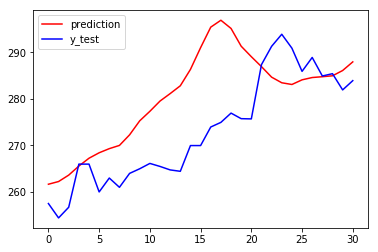

In [152]:
import matplotlib.pyplot as plt2

plt2.plot((p * 1000 ) ,color='red', label='prediction')
plt2.plot(y_test * 1000,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.show()

In [155]:
def load_data_last(stock_name, seq_len, window ):
    from pandas_datareader import data

    # Only get the adjusted close.
    df = data.DataReader(stock_name,
                       start='2018-08-01',
                       end='2018-09-03',
                       data_source='yahoo')

    

    df = df[0:-1]
    data_x = df
    
    #print("DATA Y 0 :",data_y)
    data_x = data_x.values / 1000
    print("data_x input:",data_x)
    data_x = np.delete(data_x,np.s_[len(data_x[0])-1],axis=1)
    
    #print("DATA Y :",data_y)
    amount_of_features = len(data_x[0]) 
    
    sequence_length = seq_len 
    result_x = []

    for index in range(len(data_x) - sequence_length ):
        result_x.append(data_x[index: index + sequence_length + 1])

    x_train = np.array(result_x)
    x_train = x_train[:, :-1] 
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features ))
    
    print ("x_train:",x_train)
  
    return [x_train]

In [157]:
df_new = load_data_last ('TS.BA', 5, 10 )

window  =  5

print(df_new)
pred = model.predict(df_new) 
print(pred)

data_x input: [[ 0.516       0.505       0.515       0.51359998 29.859       0.51359998]
 [ 0.523       0.513       0.515       0.52215002 29.058       0.52215002]
 [ 0.53884998  0.52504999  0.52504999  0.53370001 84.355       0.53370001]
 [ 0.553       0.53        0.53        0.54779999 47.823       0.54779999]
 [ 0.556       0.54415002  0.55        0.55315002 34.555       0.55315002]
 [ 0.60495001  0.55        0.553       0.60029999 58.823       0.60029999]
 [ 0.681       0.595       0.595       0.64995001 70.135       0.64995001]
 [ 0.652       0.61704999  0.64995001  0.62465002 54.83        0.62465002]
 [ 0.675       0.62        0.625       0.62184998 31.015       0.62184998]]
x_train: [[[ 0.516       0.505       0.515       0.51359998 29.859     ]
  [ 0.523       0.513       0.515       0.52215002 29.058     ]
  [ 0.53884998  0.52504999  0.52504999  0.53370001 84.355     ]
  [ 0.553       0.53        0.53        0.54779999 47.823     ]
  [ 0.556       0.54415002  0.55        0.553

ValueError: Error when checking input: expected lstm_17_input to have shape (5, 6) but got array with shape (5, 5)